0 Type, Description<br>
1 sflow_agent_address, IP address of agent <br>
2 inputPort, Router/switch port number receiving packet <br>
3 outputPort, Router/switch port number through which packet is sent out<br>
4 src_MAC, MAC of transmitting host<br>
5 dst_MAC, MAC of receiving host<br>
6 ethernet_type <br>
7 in_vlan, VLAN where packet is received<br>
8 out_vlan, VLAN where packet is sent out<br>
9 src_IP, IP address of sending host of packet<br>
10 dst_IP, IP address of receiver host of packet<br>
11 IP_protocol, TCP=6;UDP=17<br>
12 ip_tos, Type of service<br>
13 ip_ttl, Value of Time To Live of packet<br>
14 udp_src_port/tcp_src_port/icmp_type, Source port address at transport level<br>
15 udp_dst_port/tcp_dst_port/icmp_code, Destination port address of application service requested<br>
16 tcp_flags, specifying type of attribute<br>
17 packet_size, including MAC headers<br>
18 IP_size, size of IP packets<br>
19 sampling rate<br>


Top 5 Talkers: IP address, # of packets, Organisation who owns ip<br>
Top 5 Listeners: IP address, # of packets, Organisation who owns ip<br>
Top 5 Applications:Destination IP port number, # of packets, Service<br>
Total traffic<br>
Proportion of TCP and UDP packets: header value, transport layer protocol, # of packets<br>
Top 5 communication pair<br>
Visualising communication between different IP hosts<br>

In [ ]:
import pandas as pd

# Specify file path
# file_path = 'C:/Users/qiyangsoo/Downloads/Data_3.csv'
file_path='./Data_3.csv'
# Define the maximum number of fields expected in a row
max_fields = 20

# Read the CSV file without specifying header names
try:
  df = pd.read_csv(file_path, header=None, usecols=range(max_fields))
except FileNotFoundError:
  print("File not found")

#Keep a copy of original df for future use
original_df = df #rmb to drop last column again and add headers

# Create a boolean mask where the value in the first column is not "CNTR"
mask = df.iloc[:, 0]!="CNTR"

#Apply mask to filter out rows where the value in the first column is not "CNTR"
df_filtered = df[mask]
df = df_filtered

# Define the header names as a list
header_names = ['FLOW','sflow_agent_address','inputPort','outputPort','src_MAC',
                'dst_MAC','ethernet_type','in_vlan','out_vlan','src_IP','dst_IP'
                ,'IP_protocol','ip_tos','ip_ttl',
                'udp_src_port/tcp_src_port/icmp_type',
                'udp_dst_port/tcp_dst_port/icmp_code','tcp_flags','packet_size',
                'IP_size','sampling_rate']

#Set column names of the DataFrame
df.columns = header_names

In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69370 entries, 0 to 69369
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       69370 non-null  object
 1   1       69370 non-null  object
 2   2       69370 non-null  int64 
 3   3       69370 non-null  int64 
 4   4       69370 non-null  object
 5   5       69370 non-null  object
 6   6       69370 non-null  object
 7   7       69370 non-null  int64 
 8   8       69370 non-null  int64 
 9   9       69370 non-null  object
 10  10      69370 non-null  object
 11  11      69370 non-null  int64 
 12  12      69370 non-null  object
 13  13      69370 non-null  int64 
 14  14      69370 non-null  int64 
 15  15      69370 non-null  int64 
 16  16      69370 non-null  object
 17  17      69370 non-null  int64 
 18  18      69370 non-null  int64 
 19  19      69370 non-null  int64 
dtypes: int64(11), object(9)
memory usage: 10.6+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68065 entries, 0 to 69369
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   FLOW                                 68065 non-null  object
 1   sflow_agent_address                  68065 non-null  object
 2   inputPort                            68065 non-null  int64 
 3   outputPort                           68065 non-null  int64 
 4   src_MAC                              68065 non-null  object
 5   dst_MAC                              68065 non-null  object
 6   ethernet_type                        68065 non-null  object
 7   in_vlan                              68065 non-null  int64 
 8   out_vlan                             68065 non-null  int64 
 9   src_IP                               68065 non-null  object
 10  dst_IP                               68065 non-null  object
 11  IP_protocol                          6806

In [ ]:
df.describe()

inputPort    outputPort       in_vlan      out_vlan   IP_protocol  \
count  68065.000000  6.806500e+04  68065.000000  68065.000000  68065.000000   
mean     151.746448  2.367742e+05    873.989774    675.300213      9.075002   
std       75.138758  1.593818e+07   1025.701585    565.572776      8.607297   
min        3.000000  1.000000e+00      0.000000     11.000000      0.000000   
25%      129.000000  1.300000e+02    280.000000    280.000000      6.000000   
50%      137.000000  1.930000e+02    600.000000    602.000000      6.000000   
75%      200.000000  1.990000e+02    919.000000    919.000000      6.000000   
max      258.000000  1.073742e+09   4095.000000   4095.000000    103.000000   

             ip_ttl  udp_src_port/tcp_src_port/icmp_type  \
count  68065.000000                         68065.000000   
mean      86.300169                         28857.830823   
std       57.559830                         23550.730053   
min        0.000000                             0.000000   
25%       54.000000                           873.000000   
50%       57.000000                         33001.000000   
75%      120.000000                         50537.000000   
max      255.000000                         65531.000000   

       udp_dst_port/tcp_dst_port/icmp_code   packet_size       IP_size  \
count                         68065.000000  68065.000000  68065.000000   
mean                          27509.946463    972.606744    951.705311   
std                           22823.761302    984.483549    984.282401   
min                               0.000000     47.000000     29.000000   
25%                             443.000000     77.000000     57.000000   
50%                           25981.000000   1422.000000   1400.000000   
75%                           50161.000000   1518.000000   1500.000000   
max                           65519.000000   9022.000000   9000.000000   

       sampling_rate  
count        68065.0  
mean          2048.0  
std              0.0  
min           2048.0  
25%           2048.0  
50%           2048.0  
75%           2048.0  
max           2048.0

#Top 5 Talkers

In [ ]:
# Use value_counts() to count the occurrences of each unique cell value in the specific column
src_ip_counts = df['src_IP'].value_counts()

##Print the counts for each unqiue cell value in the column
#for value, count in counts.items():
#  print(f"Value: {value}, Count: {count}")

# Select the top 5 counts
top_src_ip_counts = src_ip_counts.head(5)

# Create a DataFrame from the top_counts
top_src_ip_counts_df = pd.DataFrame({'IP address': top_src_ip_counts.index, '# of packets': top_src_ip_counts.values})

# Add a rank column to the DataFrame
top_src_ip_counts_df['Rank'] = top_src_ip_counts_df['# of packets'].rank(method='dense',ascending=False).astype(int)
df = top_src_ip_counts_df

#Display the DataFrame
print(df)

      IP address  # of packets  Rank
0   193.62.192.8          3041     1
1  155.69.160.32          2975     2
2  130.14.250.11          2604     3
3  14.139.196.58          2452     4
4  140.112.8.139          2056     5


In [ ]:
!pip install IPWhois
from ipwhois import IPWhois

def get_organisation(ip_address):
  try:
    obj = IPWhois(ip_address)
    results = obj.lookup_whois()
    organisation = results['nets'][0]['name'] #Extract organisation information
    return organisation
  except Exception as e:
    return "Organisation information not found"

# Apply get_organisation() function to each IP address in the DataFrame
df['Organisation'] = df['IP address'].apply(get_organisation)

#Display DataFrame
print(df)

      IP address  # of packets  Rank  Organisation
0   193.62.192.8          3041     1  EUR-BIO-INST
1  155.69.160.32          2975     2       NTUNET1
2  130.14.250.11          2604     3     NLM-ETHER
3  14.139.196.58          2452     4   NKN-IIT-GUW
4  140.112.8.139          2056     5         TANET


#Top 5 Listeners

In [ ]:
df = df_filtered
df.columns = header_names

# Use value_counts() to count the occurrences of each unique cell value in the specific column
dst_ip_counts = df['dst_IP'].value_counts()

##Print the counts for each unqiue cell value in the column
#for value, count in counts.items():
#  print(f"Value: {value}, Count: {count}")

# Select the top 5 counts
top_dst_ip_counts = dst_ip_counts.head(5)

# Create a DataFrame from the top_counts
top_dst_ip_counts_df = pd.DataFrame({'IP address': top_dst_ip_counts.index, '# of packets': top_dst_ip_counts.values})

# Add a rank column to the DataFrame
top_dst_ip_counts_df['Rank'] = top_dst_ip_counts_df['# of packets'].rank(method='dense',ascending=False).astype(int)
df = top_dst_ip_counts_df

#Display the DataFrame
print(df)

        IP address  # of packets  Rank
0   103.37.198.100          3841     1
1   137.132.228.15          3715     2
2   202.21.159.244          2446     3
3  192.101.107.153          2368     4
4     103.21.126.2          2056     5


In [ ]:
# Apply get_organisation() function to each IP address in the DataFrame
df['Organisation'] = df['IP address'].apply(get_organisation)

#Display DataFrame
print(df)

        IP address  # of packets  Rank  Organisation
0   103.37.198.100          3841     1  A-STAR-AS-AP
1   137.132.228.15          3715     2        NUSNET
2   202.21.159.244          2446     3         RPNET
3  192.101.107.153          2368     4          PNNL
4     103.21.126.2          2056     5       IITB-IN


#Transport Protocol

In [ ]:
df = df_filtered
#Use drop method to remove the last column
#df_without_last_column = df.drop(df.columns[-1],axis=1)
#df = df_without_last_column

df.columns = header_names
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68065 entries, 0 to 69369
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   FLOW                                 68065 non-null  object
 1   sflow_agent_address                  68065 non-null  object
 2   inputPort                            68065 non-null  int64 
 3   outputPort                           68065 non-null  int64 
 4   src_MAC                              68065 non-null  object
 5   dst_MAC                              68065 non-null  object
 6   ethernet_type                        68065 non-null  object
 7   in_vlan                              68065 non-null  int64 
 8   out_vlan                             68065 non-null  int64 
 9   src_IP                               68065 non-null  object
 10  dst_IP                               68065 non-null  object
 11  IP_protocol                          6806

In [ ]:
#Display unique values in the 'IP_protocol' column to understand the range of numberical values
unique_protocol_values = df['IP_protocol'].unique()
print("Unique Protocol Values:", unique_protocol_values)

Unique Protocol Values: [  6  17   1  41  50  47 103  58   0]


50: ESP (Encapsulating Security Payload)<br>
6: TCP (Transmission Control Protocol)<br>
17: UDP (User Datagram Protocol)<br>
0: Reserved (often used to represent IP Protocol itself)<br>
47: GRE (Generic Routing Encapsulation)<br>
41: IPv6 (Internet Protocol version 6)<br>
1: ICMP (Internet Control Message Protocol)<br>
381: MPLS-in-IP (Multiprotocol Label Switching encapsulated in IP)

In [ ]:
# Map numerical values to transport layer protocols
protocol_mapping = {
    50:"ESP",
    6: "TCP",
    17: "UDP",
    0: "Reserved",
    47: "GRE",
    41: "IPv6",
    1: "ICMP",
    381: "MPLS-in-IP",
    103: "PIM",
    58: "ICMPv6"
}

# Determine the transport layer protocol for each numerical value in the 'IP_protocol' column
df['Transport Layer Protocol'] = df['IP_protocol'].map(protocol_mapping)

#Count the number of packets for each unqiue protocol value
protocol_counts = df['IP_protocol'].value_counts().reset_index()
protocol_counts.columns = ['IP_protocol','# of packets']

#Map the IP protocol values to their corresponding protocol names
protocol_counts['Transport Layer Protocol'] = protocol_counts['IP_protocol'].map(protocol_mapping)


#Display the DataFrame with the added 'Transport Layer Protocol' column
df = protocol_counts[['IP_protocol','Transport Layer Protocol','# of packets']]
print(df)

   IP_protocol Transport Layer Protocol  # of packets
0            6                      TCP         56064
1           17                      UDP          9462
2           50                      ESP          1698
3           47                      GRE           657
4           41                     IPv6           104
5            1                     ICMP            74
6           58                   ICMPv6             4
7          103                      PIM             1
8            0                 Reserved             1


<ipython-input-88-6b6dccf3c0a5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transport Layer Protocol'] = df['IP_protocol'].map(protocol_mapping)


In [ ]:
# Calculate the total number of packets for UDP and TCP protocols
udp_packets = protocol_counts.loc[protocol_counts['IP_protocol']==17, '# of packets'].sum()
tcp_packets = protocol_counts.loc[protocol_counts['IP_protocol']==6, '# of packets'].sum()

#Calculate the total number of packets for all protocols
total_packets = protocol_counts['# of packets'].sum()

#Calculate the percentage of UDP and TCP packets out of all protocols
udp_percentage = udp_packets/total_packets * 100
tcp_percentage = tcp_packets/total_packets * 100

print("Percentage of UDP packets:", udp_percentage, "%")
print("Percentage of TCP packets:", tcp_percentage, "%")

Percentage of UDP packets: 13.901417762432969 %
Percentage of TCP packets: 82.36832439579813 %


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   IP_protocol               9 non-null      int64 
 1   Transport Layer Protocol  9 non-null      object
 2   # of packets              9 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [ ]:
df = df_filtered

#Use drop method to remove the last column
df_without_last_column = df.drop(df.columns[-1],axis=1)

df = df_without_last_column
df.columns = header_names

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68065 entries, 0 to 69369
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   FLOW                                 68065 non-null  object
 1   sflow_agent_address                  68065 non-null  object
 2   inputPort                            68065 non-null  int64 
 3   outputPort                           68065 non-null  int64 
 4   src_MAC                              68065 non-null  object
 5   dst_MAC                              68065 non-null  object
 6   ethernet_type                        68065 non-null  object
 7   in_vlan                              68065 non-null  int64 
 8   out_vlan                             68065 non-null  int64 
 9   src_IP                               68065 non-null  object
 10  dst_IP                               68065 non-null  object
 11  IP_protocol                          6806

#Applications Protocol

In [ ]:
# Use value_counts() to count the occurrences of each unique cell value in the specific column
dst_port_num_counts = df['udp_dst_port/tcp_dst_port/icmp_code'].value_counts()

##Print the counts for each unqiue cell value in the column
#for value, count in counts.items():
#  print(f"Value: {value}, Count: {count}")

# Select the top 5 counts
top_dst_port_num_counts = dst_port_num_counts.head(5)

# Create a DataFrame from the top_counts
top_dst_port_num_counts_df = pd.DataFrame({'Destination IP port number': top_dst_port_num_counts.index, '# of packets': top_dst_port_num_counts.values})
top_dst_port_num_counts_df['Rank'] = top_dst_port_num_counts_df['# of packets'].rank(method='dense',ascending=False).astype(int)
df = top_dst_port_num_counts_df
#Display the DataFrame
print(df)

   Destination IP port number  # of packets  Rank
0                         443         13423     1
1                          80          2647     2
2                       52866          2068     3
3                       45512          1356     4
4                       56152          1341     5


In [ ]:
services = ['HTTPS','HTTP','Dynamic and/or Private Ports','Unassigned','Dynamic and/or Private Ports']

df = pd.DataFrame({'Destination IP port number': top_dst_port_num_counts_df['Destination IP port number'],
                  '# of packets': top_dst_port_num_counts_df['# of packets'],
                  'Rank': top_dst_port_num_counts_df['Rank'],
                  'Services': services})


print(df)

   Destination IP port number  # of packets  Rank  \
0                         443         13423     1   
1                          80          2647     2   
2                       52866          2068     3   
3                       45512          1356     4   
4                       56152          1341     5   

                       Services  
0                         HTTPS  
1                          HTTP  
2  Dynamic and/or Private Ports  
3                    Unassigned  
4  Dynamic and/or Private Ports  


#Traffic

In [ ]:
df = df_filtered
df_no_last_column = df.drop(df.columns[-1],axis=1)
df = df_no_last_column
df.columns = header_names
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68065 entries, 0 to 69369
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   FLOW                                 68065 non-null  object
 1   sflow_agent_address                  68065 non-null  object
 2   inputPort                            68065 non-null  int64 
 3   outputPort                           68065 non-null  int64 
 4   src_MAC                              68065 non-null  object
 5   dst_MAC                              68065 non-null  object
 6   ethernet_type                        68065 non-null  object
 7   in_vlan                              68065 non-null  int64 
 8   out_vlan                             68065 non-null  int64 
 9   src_IP                               68065 non-null  object
 10  dst_IP                               68065 non-null  object
 11  IP_protocol                          6806

In [ ]:
# Determine the total number of packets captured during the 15 second interval
total_packets = len(df)

#Calculate the total number of bytes transmitted in those packets
total_bytes = df['IP_size'].sum() #Assume all packets in the excel was captured during the 15 second interval

# Display the estimated total traffic in MB
MB = total_bytes/1024/1024/8

print("Estimated Total Traffic:", MB, "MBs")

Estimated Total Traffic: 7.722118139266968 MBs


#Additional Analysis
- Top 5 Communication pairs
- Visualisation of communications between different IP hosts

In [ ]:
df = df_filtered
#Use drop method to remove the last column
df_without_last_column = df.drop(df.columns[-1],axis=1)
df = df_without_last_column
df.columns = header_names

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68065 entries, 0 to 69369
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   FLOW                                 68065 non-null  object
 1   sflow_agent_address                  68065 non-null  object
 2   inputPort                            68065 non-null  int64 
 3   outputPort                           68065 non-null  int64 
 4   src_MAC                              68065 non-null  object
 5   dst_MAC                              68065 non-null  object
 6   ethernet_type                        68065 non-null  object
 7   in_vlan                              68065 non-null  int64 
 8   out_vlan                             68065 non-null  int64 
 9   src_IP                               68065 non-null  object
 10  dst_IP                               68065 non-null  object
 11  IP_protocol                          6806

In [ ]:
# Group the data by unique pairs of source and destination IP addresses
communication_pairs = df.groupby(['src_IP', 'dst_IP']).size().reset_index(name='count')

# Sort the pairs based on the count in descending oder
top_5_pairs_counts = communication_pairs.sort_values(by='count',ascending=False).head(5)

# Create a DataFrame from the top_counts
top_5_pairs_counts_df = pd.DataFrame({'Source IP': top_5_pairs_counts['src_IP'],
                                      'Destination IP': top_5_pairs_counts['dst_IP'],
                                      '# of packets': top_5_pairs_counts['count']})

# Add a rank column
top_5_pairs_counts_df['Rank'] = top_5_pairs_counts_df['# of packets'].rank(method='dense',ascending=False).astype(int)

In [ ]:
df = top_5_pairs_counts_df

#Display the DataFrame
print(df.to_string(index=False))

     Source IP  Destination IP  # of packets  Rank
  193.62.192.8  137.132.228.15          3041     1
 130.14.250.11  103.37.198.100          2599     2
 14.139.196.58 192.101.107.153          2368     3
 140.112.8.139    103.21.126.2          2056     4
137.132.228.15    193.62.192.8          1910     5


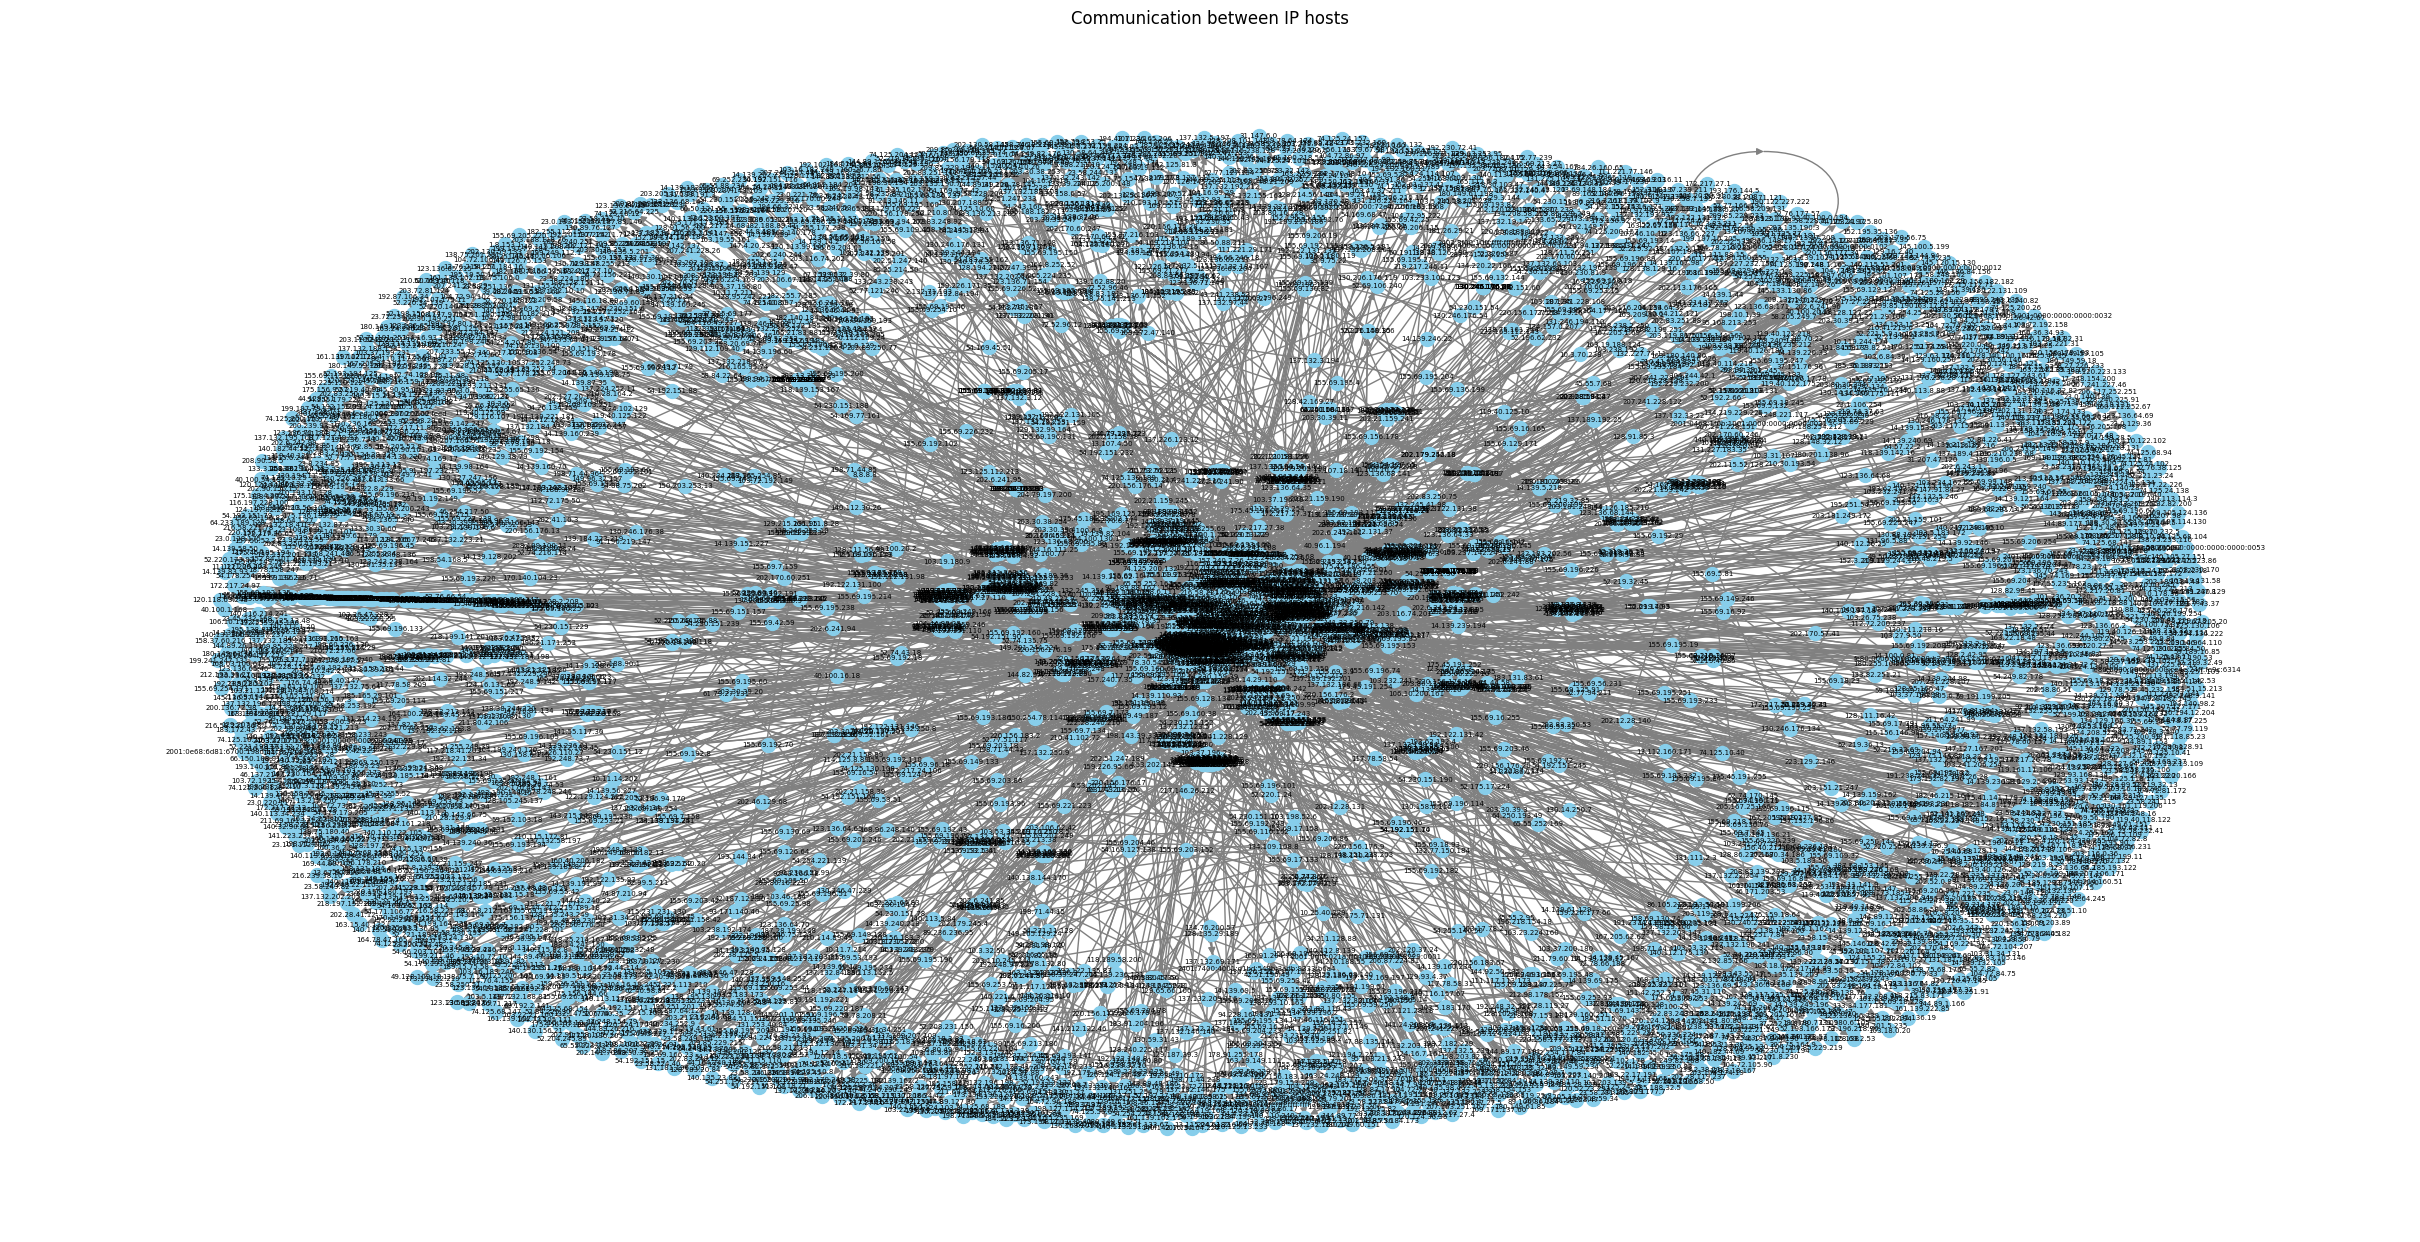

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.from_pandas_edgelist(communication_pairs, 'src_IP', 'dst_IP', create_using=nx.DiGraph())

#Set the layout using Fruchterman-Reingold algorithm (not good enough)
pos = nx.fruchterman_reingold_layout(G)

#Plot the graph
plt.figure(figsize=(24,12))
nx.draw(G,pos, with_labels=True, node_color='skyblue', node_size=100, edge_color ='grey',
        linewidths=1,font_size=5)
plt.title('Communication between IP hosts')
plt.show()